## Vision por computadora 1 - FIUBA
### Parte 1 (imágenes en white_patch y coord_cromaticas)
#### 1.Implementar el algoritmo de pasaje a coordenadas cromáticas para librarnos de las variaciones de constraste.

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

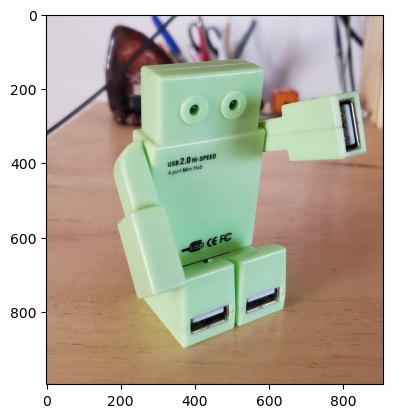

In [2]:
image = cv2.imread('tp1_resources/coord_cromaticas/CoordCrom_1.png')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 
plt.imshow(image_rgb)

In [3]:
image_rgb.shape

(996, 908, 3)

In [4]:
image_rgb[:,:,0]

array([[215, 215, 216, ..., 209, 206, 207],
       [216, 216, 216, ..., 204, 207, 205],
       [216, 216, 216, ..., 205, 206, 204],
       ...,
       [176, 177, 180, ..., 149, 152, 151],
       [178, 176, 177, ..., 152, 155, 152],
       [177, 175, 174, ..., 156, 152, 151]], dtype=uint8)

In [5]:
image_rgb[:,:,0] + image_rgb[:,:,1]

array([[169, 169, 170, ..., 142, 136, 135],
       [169, 169, 169, ..., 132, 138, 134],
       [170, 171, 171, ..., 135, 136, 133],
       ...,
       [ 51,  54,  60, ..., 254,   4,   2],
       [ 55,  51,  52, ...,   4,  10,   4],
       [ 54,  51,  51, ...,  11,   3, 255]], dtype=uint8)

In [6]:
image_rgb[:,:,0].astype(np.uint16) + image_rgb[:,:,1].astype(np.uint16) + image_rgb[:,:,2].astype(np.uint16)

array([[642, 641, 643, ..., 578, 569, 567],
       [641, 641, 641, ..., 563, 572, 566],
       [642, 644, 644, ..., 567, 568, 562],
       ...,
       [410, 414, 423, ..., 330, 339, 336],
       [415, 409, 411, ..., 339, 348, 339],
       [412, 408, 409, ..., 349, 337, 331]], dtype=uint16)

In [7]:
total = image_rgb[:,:,0].astype(np.uint16) + image_rgb[:,:,1].astype(np.uint16) + image_rgb[:,:,2].astype(np.uint16)
image_rgb[:,:,0]/total

C:\Users\Ramiro\AppData\Local\Temp\ipykernel_23292\3469986039.py:2: RuntimeWarning: invalid value encountered in divide
  image_rgb[:,:,0]/total


array([[0.33489097, 0.33541342, 0.33592535, ..., 0.3615917 , 0.36203866,
        0.36507937],
       [0.33697348, 0.33697348, 0.33697348, ..., 0.36234458, 0.36188811,
        0.36219081],
       [0.3364486 , 0.33540373, 0.33540373, ..., 0.36155203, 0.36267606,
        0.36298932],
       ...,
       [0.42926829, 0.42753623, 0.42553191, ..., 0.45151515, 0.44837758,
        0.44940476],
       [0.42891566, 0.43031785, 0.43065693, ..., 0.44837758, 0.4454023 ,
        0.44837758],
       [0.42961165, 0.42892157, 0.42542787, ..., 0.4469914 , 0.45103858,
        0.45619335]])

In [8]:
image_rgb[:,:,0] # r
image_rgb[:,:,1] # g
image_rgb[:,:,2] # b

array([[217, 216, 217, ..., 180, 177, 176],
       [216, 216, 216, ..., 175, 178, 176],
       [216, 217, 217, ..., 176, 176, 173],
       ...,
       [103, 104, 107, ...,  76,  79,  78],
       [104, 102, 103, ...,  79,  82,  79],
       [102, 101, 102, ...,  82,  78,  76]], dtype=uint8)

In [9]:
def get_chromatic_coordinates(rgb_image):
    r = image_rgb[:,:,0].astype(np.uint16)
    g = image_rgb[:,:,1].astype(np.uint16)
    b = image_rgb[:,:,2].astype(np.uint16)
    divider = r+g+b
    print(divider)
    ans = np.zeros(shape=(rgb_image.shape), dtype=np.float64)
    ans[:,:,0] = r/divider
    ans[:,:,1] = g/divider
    ans[:,:,2] = b/divider
    return ans

In [10]:
new_image = get_chromatic_coordinates(image_rgb)

[[642 641 643 ... 578 569 567]
 [641 641 641 ... 563 572 566]
 [642 644 644 ... 567 568 562]
 ...
 [410 414 423 ... 330 339 336]
 [415 409 411 ... 339 348 339]
 [412 408 409 ... 349 337 331]]


C:\Users\Ramiro\AppData\Local\Temp\ipykernel_23292\66698783.py:8: RuntimeWarning: invalid value encountered in divide
  ans[:,:,0] = r/divider
C:\Users\Ramiro\AppData\Local\Temp\ipykernel_23292\66698783.py:9: RuntimeWarning: invalid value encountered in divide
  ans[:,:,1] = g/divider
C:\Users\Ramiro\AppData\Local\Temp\ipykernel_23292\66698783.py:10: RuntimeWarning: invalid value encountered in divide
  ans[:,:,2] = b/divider


C:\Users\Ramiro\anaconda3\envs\maestria\Lib\site-packages\matplotlib\cm.py:494: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


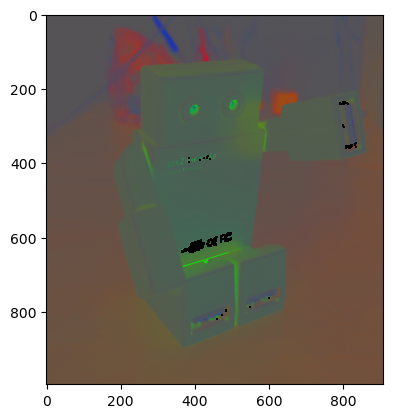

In [11]:
plt.imshow(new_image)

Claramente cuando r, g y b son todos simultáneamente 0, el algoritmo tiene problemas ya que no está definida la división por 0.

In [12]:
def get_chromatic_coordinates(rgb_image, epsilon=1e-1):
    r = image_rgb[:,:,0].astype(np.uint16)
    g = image_rgb[:,:,1].astype(np.uint16)
    b = image_rgb[:,:,2].astype(np.uint16)
    divider = r + g + b + epsilon
    print(divider)
    ans = np.zeros(shape=(rgb_image.shape), dtype=np.float64)
    ans[:,:,0] = r/divider
    ans[:,:,1] = g/divider
    ans[:,:,2] = b/divider
    return ans

In [13]:
new_image = get_chromatic_coordinates(image_rgb)

[[642.1 641.1 643.1 ... 578.1 569.1 567.1]
 [641.1 641.1 641.1 ... 563.1 572.1 566.1]
 [642.1 644.1 644.1 ... 567.1 568.1 562.1]
 ...
 [410.1 414.1 423.1 ... 330.1 339.1 336.1]
 [415.1 409.1 411.1 ... 339.1 348.1 339.1]
 [412.1 408.1 409.1 ... 349.1 337.1 331.1]]


In [14]:
new_image.shape

(996, 908, 3)

In [15]:
new_image

array([[[0.33483881, 0.32705186, 0.33795359],
        [0.3353611 , 0.327562  , 0.33692092],
        [0.33587311, 0.32654331, 0.33742808],
        ...,
        [0.36152915, 0.32693306, 0.31136482],
        [0.36197505, 0.32683184, 0.3110174 ],
        [0.36501499, 0.32445777, 0.31035091]],

       [[0.33692092, 0.32600218, 0.33692092],
        [0.33692092, 0.32600218, 0.33692092],
        [0.33692092, 0.32600218, 0.33692092],
        ...,
        [0.36228023, 0.32676256, 0.31077961],
        [0.36182486, 0.32686593, 0.31113442],
        [0.36212683, 0.32679739, 0.31089913]],

       [[0.3363962 , 0.32705186, 0.3363962 ],
        [0.33535165, 0.32758888, 0.33690421],
        [0.33535165, 0.32758888, 0.33690421],
        ...,
        [0.36148827, 0.32798448, 0.31035091],
        [0.36261222, 0.32740715, 0.30980461],
        [0.36292475, 0.32912293, 0.30777442]],

       ...,

       [[0.42916362, 0.31943428, 0.25115825],
        [0.42743299, 0.32117846, 0.25114707],
        [0.42543134, 0

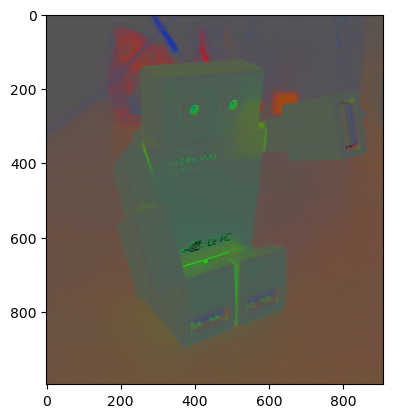

In [16]:
plt.imshow(new_image, vmin=0, vmax=1)

# CHECKPOINT

In [17]:
def show_images_from_folder(folder_path, callback=None):
    for filename in os.listdir(folder_path):
        if filename.endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
            img_path = os.path.join(folder_path, filename)
            
            image = cv2.imread(img_path)
            if image is None:
                print(f"Error al abrir la imagen: {img_path}")
                continue
            
            image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            
            plt.imshow(image_rgb)
            plt.title(filename)
            plt.axis('off')
            plt.show()

            if callback is not None:
                image_rgb_modified = callback(image_rgb)
                plt.imshow(image_rgb_modified)
                plt.title('modified_' + filename)
                plt.axis('off')
                plt.show()

In [18]:
# ESTA NO TIRA WARNINGS

def get_chromatic_coordinates_2(rgb_image):
  
    r = rgb_image[:, :, 0].astype(np.float64)
    g = rgb_image[:, :, 1].astype(np.float64)
    b = rgb_image[:, :, 2].astype(np.float64)

    divider = r + g + b

    ans = np.zeros_like(rgb_image, dtype=np.float64)

    mask = divider > 0

    ans[mask, 0] = r[mask] / divider[mask]
    ans[mask, 1] = g[mask] / divider[mask]
    ans[mask, 2] = b[mask] / divider[mask]
    
    return ans

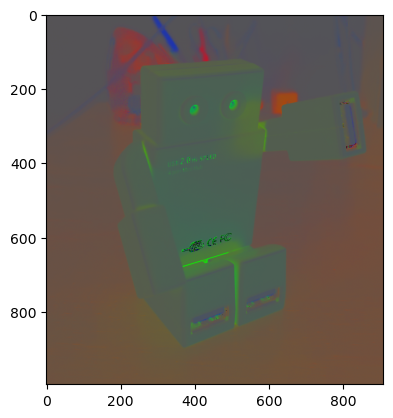

In [19]:
new_image_2 = get_chromatic_coordinates_2(image_rgb)
plt.imshow(new_image_2, vmin=0, vmax=1)

In [20]:
new_image - new_image_2 # Fijarse que no dan exactamente igual!

array([[[-5.21555779e-05, -5.09426575e-05, -5.26407461e-05],
        [-5.23184240e-05, -5.11017165e-05, -5.25617655e-05],
        [-5.22353211e-05, -5.07843399e-05, -5.24771513e-05],
        ...,
        [-6.25482954e-05, -5.65628126e-05, -5.38693453e-05],
        [-6.36160015e-05, -5.74396906e-05, -5.46603508e-05],
        [-6.43765412e-05, -5.72235922e-05, -5.47356099e-05]],

       [[-5.25617655e-05, -5.08583750e-05, -5.25617655e-05],
        [-5.25617655e-05, -5.08583750e-05, -5.25617655e-05],
        [-5.25617655e-05, -5.08583750e-05, -5.25617655e-05],
        ...,
        [-6.43481766e-05, -5.80395319e-05, -5.52006417e-05],
        [-6.32560937e-05, -5.71443938e-05, -5.43941289e-05],
        [-6.39800058e-05, -5.77380540e-05, -5.49291757e-05]],

       [[-5.23981620e-05, -5.09426575e-05, -5.23981620e-05],
        [-5.20732381e-05, -5.08678391e-05, -5.23143179e-05],
        [-5.20732381e-05, -5.08678391e-05, -5.23143179e-05],
        ...,
        [-6.37545456e-05, -5.78455877e-05,

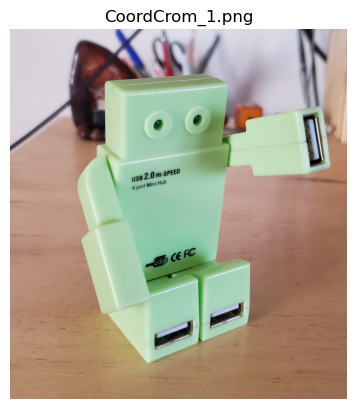

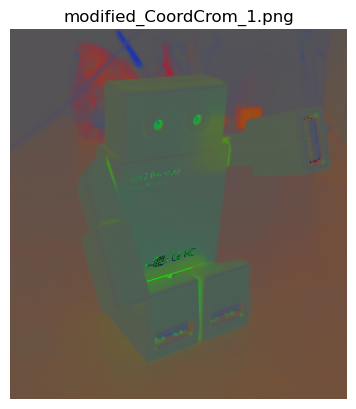

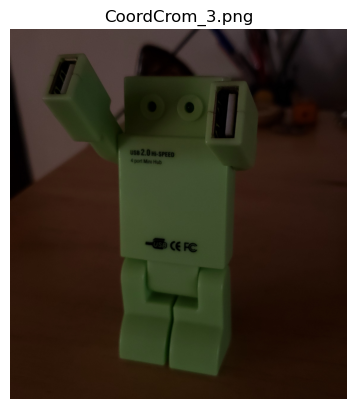

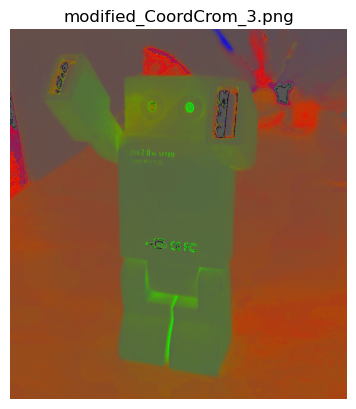

In [21]:
folder_path_cc = 'tp1_resources/coord_cromaticas'
show_images_from_folder(folder_path_cc, callback=get_chromatic_coordinates_2)

#### 2.Implementar el algoritmo de White Patch para librarnos de las diferencias de color de iluminación

In [22]:
def white_patch(rgb_image):
    r = rgb_image[:, :, 0].astype(np.float64)
    g = rgb_image[:, :, 1].astype(np.float64)
    b = rgb_image[:, :, 2].astype(np.float64)

    max_r = np.max(r)
    max_g = np.max(g)
    max_b = np.max(b)

    # mask = (r + g + b) > 0
    mask_r = r  > 0
    mask_g = g  > 0
    mask_b = b  > 0
    
    ans = np.zeros_like(rgb_image, dtype=np.float64)

    # ans[mask, 0] = r[mask] * 255 / max_r
    # ans[mask, 1] = g[mask] * 255 / max_g
    # ans[mask, 2] = b[mask] * 255 / max_b

    ans[mask_r, 0] = r[mask_r] * 255 / max_r
    ans[mask_g, 1] = g[mask_g] * 255 / max_g
    ans[mask_b, 2] = b[mask_b] * 255 / max_b

    
    ans = np.clip(ans, 0, 255) 

    return ans.astype(np.uint8)

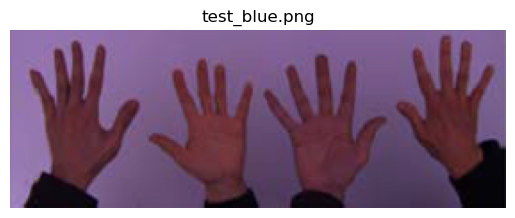

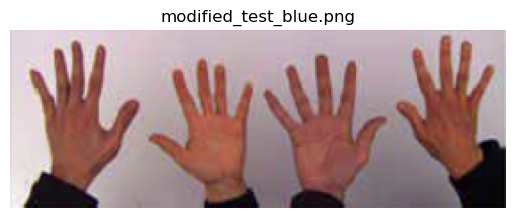

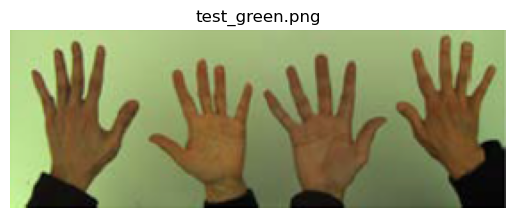

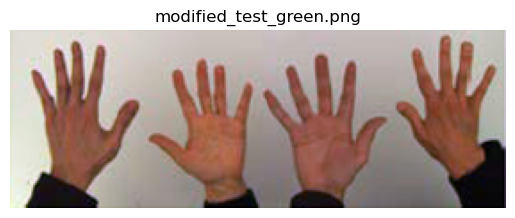

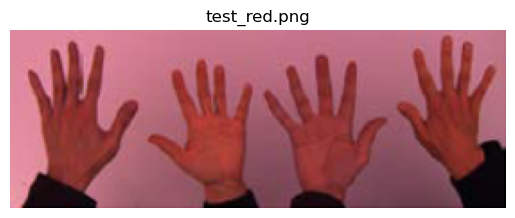

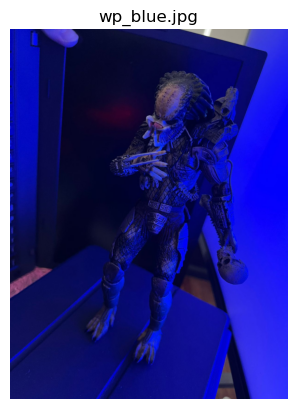

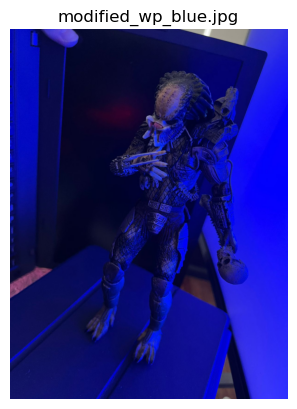

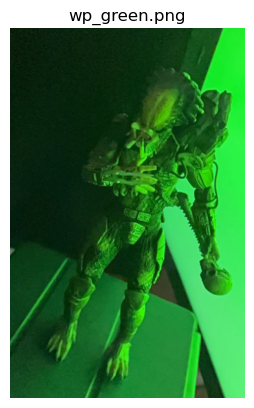

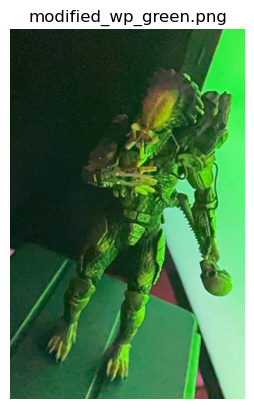

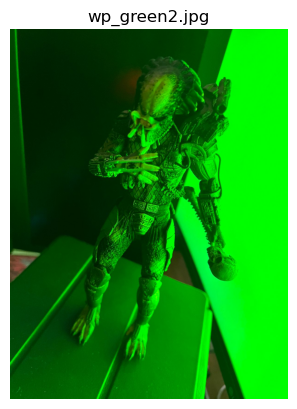

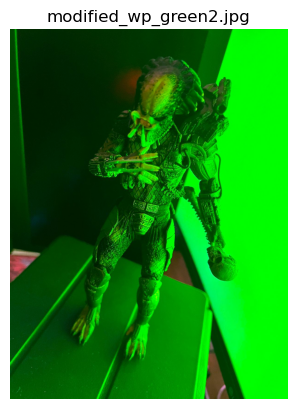

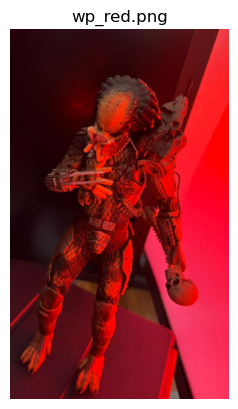

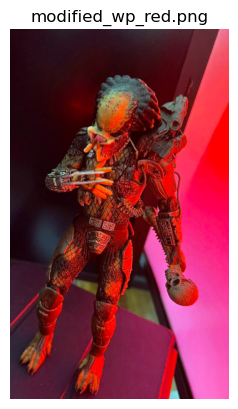

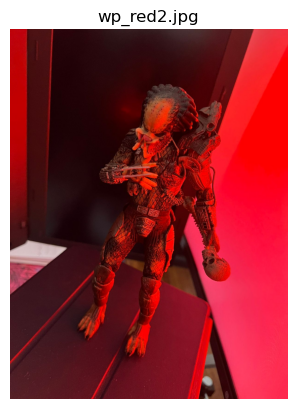

In [23]:
folder_path_wp = 'tp1_resources/white_patch/'
show_images_from_folder(folder_path_wp, callback=white_patch)

### Análisis White Patch:

Si hay objetos en la imagen que son verdaderamente blancos o claros, el método puede hacer que estos se sobreexpongan, lo que puede hacer que se pierda información visual importante. 

En imágenes donde los colores son muy saturados, la corrección puede llevar a valores que caen fuera del rango de visualización. Esto se resuelve haciendo un clipping, lo que a su vez trae aparejada una saturación de la imagen. Este efecto es particularmente notorio, por ejemplo, en imágenes como _wp_green2.jpg_.

Por otro lado, si la imagen tiene una gran cantidad de píxeles oscuros (cercanos a cero) y pocos píxeles claros, el método puede ajustar incorrectamente los valores de los píxeles, ya que intenta normalizar todo en función de los máximos.

### Parte 2


In [30]:
def show_grayscale(filename):
    image = cv2.imread(filename)
    image_gs = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            
    plt.imshow(image_gs, cmap='gray')
    plt.title(filename)
    plt.axis('off')
    plt.show()

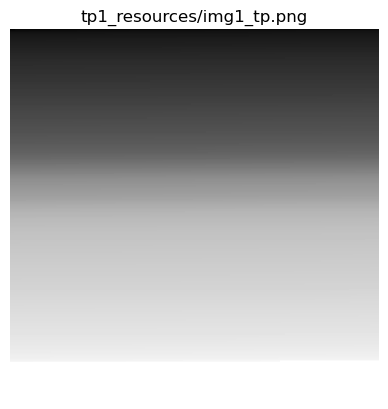

In [31]:
show_grayscale('tp1_resources/img1_tp.png')

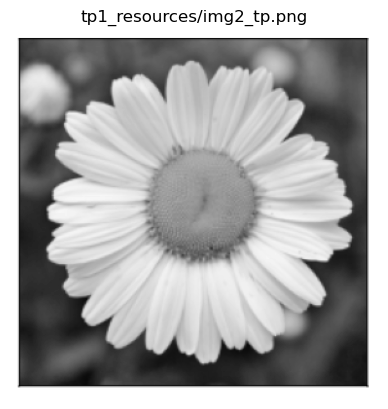

In [32]:
show_grayscale('tp1_resources/img2_tp.png')